In [2]:
from scipy.stats import mode
import sqlite3, csv, os
from sqlalchemy import (Boolean, Column, Enum, ForeignKey, Integer, String,PickleType,MetaData,
                        Float,Table, UniqueConstraint, create_engine)
from sqlalchemy import (not_, select,and_) 
from datetime import datetime
from sqlalchemy import *
from sqlalchemy.dialects.postgresql import ARRAY
from sklearn import datasets
from sklearn import *
# from sklearn.model_selection import train_test_split
from numpy import genfromtxt
import numpy as np
import time
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
# from sklearn import model_selection
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# from unsupervised_alt import *
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import scipy

## Read in label data

In [3]:
data_dir = '/home/lun5/ADH/'
label_fname = 'Jeff_annotations_ADHAllSets.csv'
label_files = pd.read_csv(os.path.join(data_dir,label_fname))
# omit 'Dont know' and 'Other'
label_files = label_files.loc[label_files.Score.isin(['Normal Duct','Columnar', 'ADH', 'Flat Epithelial'])]

In [124]:
label_files.loc[1,:]

Participant             Jeff Fine
Image          adh08-1c_seg14.jpg
Score                 Normal Duct
FolderName               adh08-1c
Name: 1, dtype: object

In [4]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5)
train_index, test_index = skf.split(xrange(len(label_files)), label_files['Score']).next()

In [16]:
train_df = label_files.iloc[train_index]
test_df = label_files.iloc[test_index]
print 'whole data'
print label_files.groupby(['Score'], as_index=False).size()
print '\nTrain set: ', len(train_df), ' ROIs'
print train_df.groupby(['Score'], as_index=False).size()
print '\nTest set: ', len(test_df), ' ROIs'
print test_df.groupby(['Score'], as_index=False).size()
train_df.to_csv(os.path.join(data_dir,'ADH_4classes_train.csv'))
test_df.to_csv(os.path.join(data_dir,'ADH_4classes_test.csv'))

whole data
Score
ADH                190
Columnar           287
Flat Epithelial    180
Normal Duct        812
dtype: int64

Train set:  1174  ROIs
Score
ADH                152
Columnar           229
Flat Epithelial    144
Normal Duct        649
dtype: int64

Test set:  295  ROIs
Score
ADH                 38
Columnar            58
Flat Epithelial     36
Normal Duct        163
dtype: int64


In [19]:
# ADH vs. non ADH
isADH = label_files.Score.isin(['ADH'])
label_files['isADH'] = pd.Series(isADH)
# malignant vs non
isMalignant = label_files.Score.isin(['ADH', 'Flat Epithelial'])
label_files['isMalignant'] = pd.Series(isMalignant)

Participant                Image            Score FolderName  isADH  \
1      Jeff Fine   adh08-1c_seg14.jpg      Normal Duct   adh08-1c  False   
2      Jeff Fine    adh04-1a_seg7.jpg      Normal Duct   adh04-1a  False   
3      Jeff Fine   adh03-2a_seg53.jpg         Columnar   adh03-2a  False   
5      Jeff Fine    adh07-2a_seg4.jpg      Normal Duct   adh07-2a  False   
7      Jeff Fine  adh03-2a_seg200.jpg         Columnar   adh03-2a  False   
8      Jeff Fine    adh07-1c_seg4.jpg              ADH   adh07-1c   True   
9      Jeff Fine   adh08-1c_seg45.jpg  Flat Epithelial   adh08-1c  False   
10     Jeff Fine  adh06-1b_seg138.jpg         Columnar   adh06-1b  False   
11     Jeff Fine   adh08-1b_seg77.jpg         Columnar   adh08-1b  False   
12     Jeff Fine  adh07-1b_seg156.jpg      Normal Duct   adh07-1b  False   
13     Jeff Fine   adh04-1a_seg17.jpg      Normal Duct   adh04-1a  False   
16     Jeff Fine    adh04-1c_seg5.jpg         Columnar   adh04-1c  False   
18     Jeff Fine   adh08-1c_seg17.jpg         Columnar   adh08-1c  False   
19     Jeff Fine   adh07-2a_seg41.jpg  Flat Epithelial   adh07-2a  False   
20     Jeff Fine   adh08-1c_seg35.jpg      Normal Duct   adh08-1c  False   
22     Jeff Fine    adh05-1a_seg7.jpg      Normal Duct   adh05-1a  False   
23     Jeff Fine   adh04-1a_seg18.jpg      Normal Duct   adh04-1a  False   
24     Jeff Fine  adh07-1b_seg179.jpg      Normal Duct   adh07-1b  False   
25     Jeff Fine   adh07-1a_seg15.jpg              ADH   adh07-1a   True   
26     Jeff Fine   adh05-1a_seg14.jpg         Columnar   adh05-1a  False   
27     Jeff Fine   adh08-1c_seg16.jpg      Normal Duct   adh08-1c  False   
28     Jeff Fine   adh08-1c_seg26.jpg      Normal Duct   adh08-1c  False   
29     Jeff Fine    adh04-1b_seg3.jpg  Flat Epithelial   adh04-1b  False   
30     Jeff Fine   adh08-1b_seg31.jpg      Normal Duct   adh08-1b  False   
31     Jeff Fine   adh04-1a_seg11.jpg      Normal Duct   adh04-1a  False   
32     Jeff Fine   adh07-2a_seg46.jpg  Flat Epithelial   adh07-2a  False   
33     Jeff Fine   adh04-1a_seg16.jpg      Normal Duct   adh04-1a  False   
34     Jeff Fine   adh08-1b_seg65.jpg      Normal Duct   adh08-1b  False   
35     Jeff Fine   adh07-1b_seg12.jpg      Normal Duct   adh07-1b  False   
37     Jeff Fine   adh07-2a_seg22.jpg      Normal Duct   adh07-2a  False   
...          ...                  ...              ...        ...    ...   
1720   Jeff Fine   adh47-1a_seg40.jpg  Flat Epithelial   adh47-1a  False   
1724   Jeff Fine   adh48-1a_seg12.jpg      Normal Duct   adh48-1a  False   
1725   Jeff Fine   adh48-1a_seg17.jpg      Normal Duct   adh48-1a  False   
1726   Jeff Fine   adh46-2b_seg12.jpg      Normal Duct   adh46-2b  False   
1727   Jeff Fine   adh46-2a_seg40.jpg      Normal Duct   adh46-2a  False   
1728   Jeff Fine   adh46-2b_seg16.jpg      Normal Duct   adh46-2b  False   
1729   Jeff Fine   adh46-2a_seg25.jpg      Normal Duct   adh46-2a  False   
1730   Jeff Fine   adh45-6c_seg22.jpg      Normal Duct   adh45-6c  False   
1731   Jeff Fine    adh47-1b_seg5.jpg              ADH   adh47-1b   True   
1732   Jeff Fine   adh47-1a_seg61.jpg              ADH   adh47-1a   True   
1733   Jeff Fine   adh47-1a_seg25.jpg      Normal Duct   adh47-1a  False   
1734   Jeff Fine    adh48-1a_seg6.jpg      Normal Duct   adh48-1a  False   
1735   Jeff Fine    adh47-1b_seg4.jpg      Normal Duct   adh47-1b  False   
1736   Jeff Fine    adh48-1a_seg3.jpg              ADH   adh48-1a   True   
1738   Jeff Fine   adh47-1a_seg64.jpg  Flat Epithelial   adh47-1a  False   
1739   Jeff Fine   adh45-6c_seg14.jpg      Normal Duct   adh45-6c  False   
1740   Jeff Fine   adh46-2b_seg21.jpg      Normal Duct   adh46-2b  False   
1741   Jeff Fine   adh47-1a_seg39.jpg              ADH   adh47-1a   True   
1742   Jeff Fine   adh48-1a_seg26.jpg      Normal Duct   adh48-1a  False   
1743   Jeff Fine   adh47-1b_seg13.jpg      Normal Duct   adh47-1b  False   
1745   Jeff Fine    adh46-2a_seg8.jpg      Normal Duc

In [20]:
train_index, test_index = skf.split(xrange(len(label_files)), label_files['isADH']).next()
train_df = label_files.iloc[train_index]
test_df = label_files.iloc[test_index]
print 'whole data'
print label_files.groupby(['isADH'], as_index=False).size()
print '\nTrain set: ', len(train_df), ' ROIs'
print train_df.groupby(['isADH'], as_index=False).size()
print '\nTest set: ', len(test_df), ' ROIs'
print test_df.groupby(['isADH'], as_index=False).size()
train_df.to_csv(os.path.join(data_dir,'ADH_isADH_train.csv'))
test_df.to_csv(os.path.join(data_dir,'ADH_isADH_test.csv'))

whole data
isADH
False    1279
True      190
dtype: int64

Train set:  1175  ROIs
isADH
False    1023
True      152
dtype: int64

Test set:  294  ROIs
isADH
False    256
True      38
dtype: int64


In [21]:
train_index, test_index = skf.split(xrange(len(label_files)), label_files['isMalignant']).next()
train_df = label_files.iloc[train_index]
test_df = label_files.iloc[test_index]
print 'whole data'
print label_files.groupby(['isMalignant'], as_index=False).size()
print '\nTrain set: ', len(train_df), ' ROIs'
print train_df.groupby(['isMalignant'], as_index=False).size()
print '\nTest set: ', len(test_df), ' ROIs'
print test_df.groupby(['isMalignant'], as_index=False).size()
train_df.to_csv(os.path.join(data_dir,'ADH_isMalignant_train.csv'))
test_df.to_csv(os.path.join(data_dir,'ADH_isMalignant_test.csv'))

whole data
isMalignant
False    1099
True      370
dtype: int64

Train set:  1175  ROIs
isMalignant
False    879
True     296
dtype: int64

Test set:  294  ROIs
isMalignant
False    220
True      74
dtype: int64


In [14]:
wsi_names = label_files.FolderName.unique()
msk = np.random.rand(len(wsi_names)) < 0.8
train_wsi = wsi_names[msk]
test_wsi = wsi_names[~msk]

In [4]:
train_df = label_files.loc[label_files.FolderName.isin(train_wsi)]
test_df = label_files.loc[label_files.FolderName.isin(test_wsi)]
train_df.to_csv(os.path.join(data_dir,'ADH_train.csv'))
test_df.to_csv(os.path.join(data_dir,'ADH_test.csv'))

NameError: name 'train_wsi' is not defined

In [5]:
# split 4 classes
print 'whole data'
print label_files.groupby(['Score'], as_index=False).size()
print '\nTrain set: ', len(train_wsi), ' WSIs'
print train_df.groupby(['Score'], as_index=False).size()
print '\nTest set: ', len(test_wsi), ' WSIs'
print test_df.groupby(['Score'], as_index=False).size()

whole data
Score
ADH                190
Columnar           287
Flat Epithelial    180
Normal Duct        812
dtype: int64

Train set: 

NameError: name 'train_wsi' is not defined

In [106]:
train_df = pd.read_csv(os.path.join(data_dir,'ADH_4classes_train.csv'))
test_df = pd.read_csv(os.path.join(data_dir,'ADH_4classes_test.csv'))
train_wsi = train_df.FolderName.unique()

In [161]:
train_df = pd.read_csv(os.path.join(data_dir,'train_test_lists','train_concensus_v2.csv'))
test_df = pd.read_csv(os.path.join(data_dir,'train_test_lists','test_concensus_v2.csv'))
train_wsi = train_df.FolderName.unique()

In [162]:
image_no_features = ['adh05-1a_seg13_boundary_2ndPass_normalized_masked.mat',
'adh03-2a_seg58_boundary_2ndPass_normalized_masked.mat',
'adh08-1a_seg73_boundary_2ndPass_normalized_masked.mat',
'adh04-1b_seg6_boundary_2ndPass_normalized_masked.mat',
'adh06-1b_seg48_boundary_2ndPass_normalized_masked.mat',
'adh04-1b_seg15_boundary_2ndPass_normalized_masked.mat',
'adh04-1a_seg21_boundary_2ndPass_normalized_masked.mat',
'adh08-1b_seg25_boundary_2ndPass_normalized_masked.mat',
'adh04-1b_seg14_boundary_2ndPass_normalized_masked.mat',
'adh04-1b_seg18_boundary_2ndPass_normalized_masked.mat',
'adh05-1a_seg16_boundary_2ndPass_normalized_masked.mat',
'adh04-1a_seg4_boundary_2ndPass_normalized_masked.mat',
'adh14-1a_seg19_boundary_2ndPass_normalized_masked.mat',
'adh10-1b_seg32_boundary_2ndPass_normalized_masked.mat',
'adh16-1a_seg39_boundary_2ndPass_normalized_masked.mat',
'adh14-1a_seg106_boundary_2ndPass_normalized_masked.mat',
'adh22-2b_seg46_boundary_2ndPass_normalized_masked.mat',
'adh19-1b_seg12_boundary_2ndPass_normalized_masked.mat' ,
'adh26-1a_seg41_boundary_2ndPass_normalized_masked.mat' ,
'adh26-1a_seg26_boundary_2ndPass_normalized_masked.mat' ,
'adh26-1a_seg24_boundary_2ndPass_normalized_masked.mat' ,
'adh26-1a_seg14_boundary_2ndPass_normalized_masked.mat' ,
'adh30-1a_seg174_boundary_2ndPass_normalized_masked.mat' ,
'adh31-1e_seg11_boundary_2ndPass_normalized_masked.mat' ,
'adh32-1a_seg132_boundary_2ndPass_normalized_masked.mat',
'adh26-1a_seg14_boundary_2ndPass_normalized_masked.mat' ,
'adh30-1a_seg174_boundary_2ndPass_normalized_masked.mat' ,
'adh31-1e_seg11_boundary_2ndPass_normalized_masked.mat' ,
'adh32-1a_seg132_boundary_2ndPass_normalized_masked.mat' ,
'adh32-1a_seg178_boundary_2ndPass_normalized_masked.mat',
'adh35-1a_seg100_boundary_2ndPass_normalized_masked.mat' ,
'adh35-1a_seg198_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1a_seg18_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1d_seg3_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1d_seg4_boundary_2ndPass_normalized_masked.mat' ,
'adh37-4b_seg51_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg55_boundary_2ndPass_normalized_masked.mat' ,
'adh35-1a_seg198_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1a_seg18_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1d_seg3_boundary_2ndPass_normalized_masked.mat' ,
'adh36-1d_seg4_boundary_2ndPass_normalized_masked.mat' ,
'adh37-4b_seg51_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg55_boundary_2ndPass_normalized_masked.mat' ,
'adh42-1a_seg60_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg68_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg16_boundary_2ndPass_normalized_masked.mat' ,
'adh37-4b_seg44_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg44_boundary_2ndPass_normalized_masked.mat' ,
'adh37-4b_seg46_boundary_2ndPass_normalized_masked.mat' ,
'adh38-1a_seg38_boundary_2ndPass_normalized_masked.mat']

#adh08-1c_seg14.jpg
image_no_features = [a.split('_boundary')[0] + '.jpg' for a in image_no_features]
image_no_features_df = label_files.loc[label_files.Image.isin(image_no_features),:]
image_no_features_df.to_csv(os.path.join(data_dir,'images_no_features.csv'))

## Cluster nuclear morphologies with DBScan

In [233]:
# Read in the data
nuclear_feat_dir = 'ADH_nuc_features'
mat_files = os.listdir(os.path.join(data_dir, nuclear_feat_dir))

In [234]:
train_nuc_feats = []
files_no_features = []

for imname in train_df['Image']:
    mat_fname = imname.split('.')[0] + '_boundary_2ndPass_normalized_masked.mat'
    if os.path.isfile(os.path.join(data_dir, nuclear_feat_dir,mat_fname)):
        mat_dict = scipy.io.loadmat(os.path.join(data_dir, nuclear_feat_dir, mat_fname))        
        if mat_dict['data'].shape[1] == 0:
            print mat_fname, ' have 0 features'
            files_no_features.append(mat_fname)
            continue
        train_nuc_feats.append(mat_dict['data'])
    else:
        print mat_fname, ' does not exist'
#

adh36-1d_seg3_boundary_2ndPass_normalized_masked.mat  does not exist
adh36-1d_seg4_boundary_2ndPass_normalized_masked.mat  does not exist
adh42-1a_seg60_boundary_2ndPass_normalized_masked.mat  does not exist
adh31-1e_seg11_boundary_2ndPass_normalized_masked.mat  does not exist
adh38-1a_seg38_boundary_2ndPass_normalized_masked.mat  does not exist
adh38-1a_seg55_boundary_2ndPass_normalized_masked.mat  does not exist


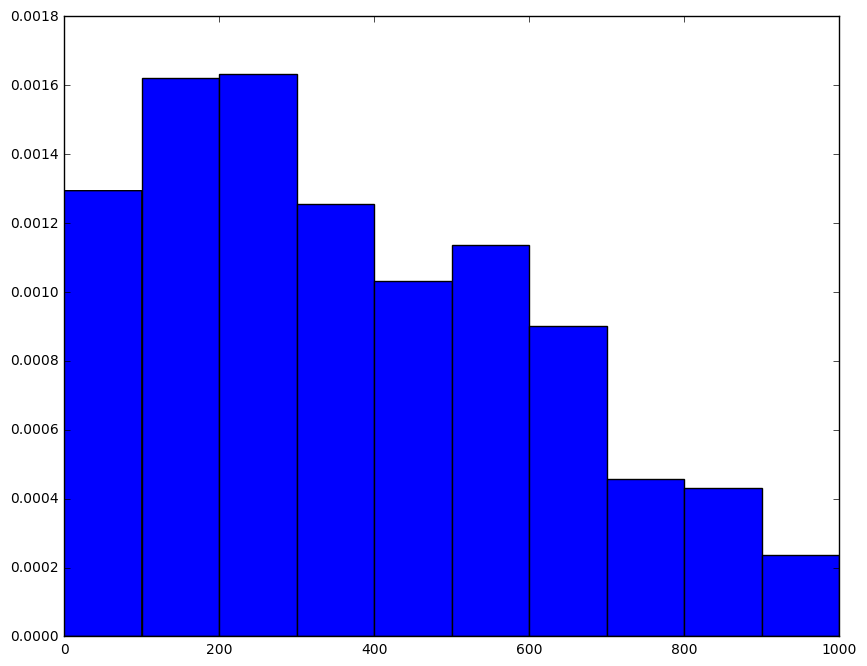

In [195]:
num_rows = [a.shape[0] for a in train_nuc_feats]
plt.figure()
plt.hist(num_rows, normed='probability',range=[0, 1000])
train_nuc_feats = np.vstack(train_nuc_feats)

In [203]:
# filter out NaN
nan_indx = np.isnan(train_nuc_feats).any(axis = 1)
filtered_nuc_feats = train_nuc_feats[~nan_indx,:]
print len(nan_indx), train_nuc_feats.shape, sum(nan_indx)
nuc_xy_areas = filtered_nuc_feats[:,:3]
filtered_nuc_feats = filtered_nuc_feats[:,2:]
print nuc_xy_areas.shape, filtered_nuc_feats.shape

429229 (429229, 198) 1365
(427864, 3) (427864, 196)


In [204]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(filtered_nuc_feats)
scaled_train_nuc_feats = scaler.transform(filtered_nuc_feats)
scaled_train_nuc_feats.shape 

(427864, 196)

In [205]:
cov = np.cov(scaled_train_nuc_feats, rowvar = False)
print cov.shape
w, v = np.linalg.eig(cov)
tmp = np.sort(w)[::-1]
var_explained = np.cumsum(tmp)/np.sum(tmp)
np.nonzero(var_explained >= 0.95)

(196, 196)


(array([ 29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195]),)

In [206]:
np.nonzero(var_explained >= 0.8)

(array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
         20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184

In [207]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=7)
start_time = time.time()
pca.fit(scaled_train_nuc_feats)
pca_nuc_feats = pca.transform(scaled_train_nuc_feats)
print 'PCA takes ', time.time() - start_time, ' seconds. % variance explained ', sum(pca.explained_variance_ratio_)

PCA takes  5.36989402771  seconds. % variance explained  0.796437789961


In [ ]:
# build a KD tree
#from sklearn.neighbors import NearestNeighbors, KDTree
#tree = KDTree(scaled_train_nuc_feats)
#for n in range(2,15):
#    dist, ind = tree.query(data_spot[:,:2], n)
#num_neighbors = scaled_train_nuc_feats.shape[1] + 1
#dist, ind = tree.query(scaled_train_nuc_feats, num_neighbors)

In [12]:
from sklearn.neighbors import NearestNeighbors
num_neighbors = 20
# sample some data
msk = np.random.rand(scaled_train_nuc_feats.shape[0]) < 0.1
sample_nuc_feats = scaled_train_nuc_feats[msk,:]
start_time = time.time()
nbrs = NearestNeighbors(n_neighbors = num_neighbors, algorithm = 'ball_tree').fit(sample_nuc_feats)
print time.time() - start_time

2.99431586266


In [21]:
from sklearn.neighbors import NearestNeighbors, BallTree
msk = np.random.rand(scaled_train_nuc_feats.shape[0]) < 0.2
sample_nuc_feats = scaled_train_nuc_feats[msk,:]
num_neighbors = 20
start_time = time.time()
tree = BallTree(sample_nuc_feats)
print time.time() - start_time

3.406924963


In [60]:
from sklearn.neighbors import NearestNeighbors, BallTree, KDTree
msk = np.random.rand(pca_nuc_feats.shape[0]) < 0.3
sample_nuc_feats = pca_nuc_feats[msk,:]
num_neighbors = 20
start_time = time.time()
#tree = BallTree(sample_nuc_feats)
tree = KDTree(sample_nuc_feats)
print time.time() - start_time

0.142488956451


In [63]:
start_time = time.time()
dist, ind = tree.query(sample_nuc_feats, k = 12)
print time.time() - start_time

16.3996269703


(0, 20)

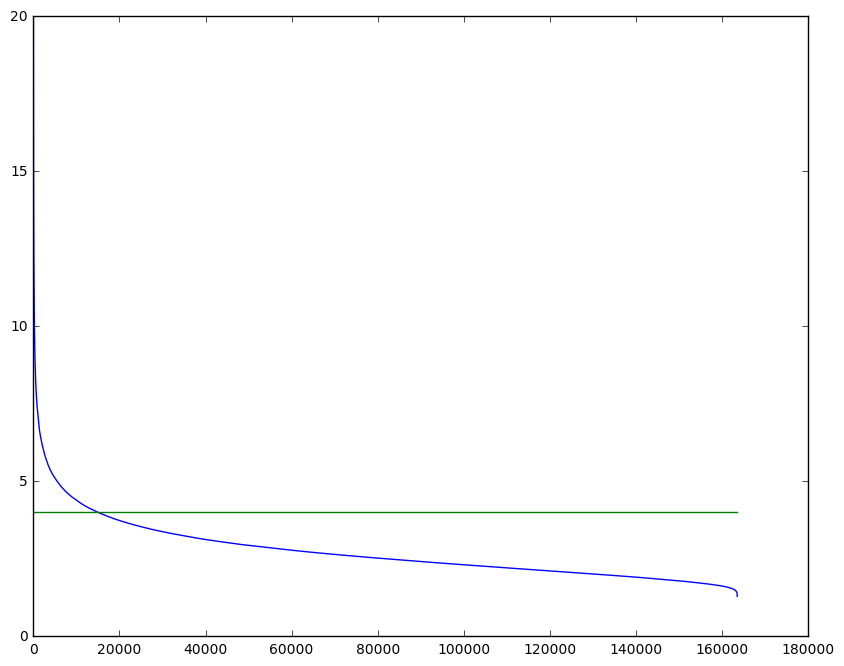

In [65]:
plt.figure()
plt.plot(xrange(len(ind)), np.sort(dist[:,11])[::-1])
plt.plot([0, len(ind)-1], [4,4])
plt.ylim([0,20])

In [66]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
msk = np.random.rand(pca_nuc_feats.shape[0]) < 0.2
sample_nuc_feats = pca_nuc_feats[msk,:]
start_time = time.time()
db = DBSCAN(eps= 3, min_samples=8, n_jobs = 6).fit(sample_nuc_feats)
print time.time() - start_time

14.9849429131


In [67]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 27


In [68]:
[np.sum(labels == i) for i in np.unique(labels)]

[17349,
 91594,
 4,
 7,
 8,
 3,
 4,
 2,
 3,
 7,
 8,
 13,
 5,
 3,
 10,
 6,
 5,
 13,
 6,
 8,
 8,
 7,
 6,
 5,
 7,
 4,
 8,
 9]

In [57]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

In [48]:
clusters = [sample_nuc_feats[labels == i] for i in xrange(n_clusters_)]
clusters_center = [np.median(cluster, axis = 0) for cluster in clusters]

In [49]:
def dbscan_predict(dbscan_model, X_new, metric=scipy.spatial.distance.euclidean):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1 

    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        for i, x_core in enumerate(dbscan_model.components_): 
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

In [52]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

## let's try kmeans then

In [224]:
train_df = pd.read_excel(os.path.join(data_dir,'train_test_lists','ADH_jeff_train_annotations.xlsx'))
test_df = pd.read_excel(os.path.join(data_dir,'train_test_lists','ADH_consensus_test_labels.xlsx'))

In [227]:
print len(train_df), len(test_df)

839 608


In [226]:
accepted_labels = ['ADH', 'Flat Epithelial', 'Columnar', 'Normal Duct']
accepted_indx = np.asarray([a in accepted_labels for a in train_df.Label])
train_df = train_df.loc[accepted_indx,:]
accepted_indx = np.asarray([a in accepted_labels for a in test_df.Label])
test_df = test_df.loc[accepted_indx,:]

In [193]:
test_df.columns = ['Image','Label']
train_df.columns = ['Image','Label']

In [208]:
pca_nuc_feats.shape

(427864, 7)

In [249]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
n_clusters = 5
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=50,
                      n_init=10, max_no_improvement=20, verbose=0)
t0 = time.time()
mbk.fit(pca_nuc_feats)
t_mini_batch = time.time() - t0
print t_mini_batch

1.95152115822


In [250]:
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
mbk_means_labels = pairwise_distances_argmin(pca_nuc_feats, mbk_means_cluster_centers)
[np.sum(mbk_means_labels == i) for i in np.unique(mbk_means_labels) ]

[51915, 116398, 125777, 103100, 30674]

In [251]:
mbk_means_labels.reshape(-1,1).shape

(427864, 1)

/home/lun5/miniconda2/envs/sql/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


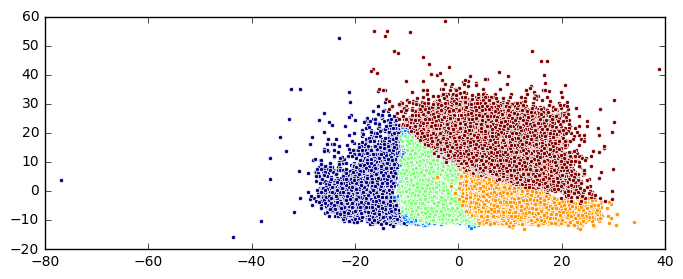

In [253]:
fig = plt.figure(figsize=(8, 3))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, n_clusters))

for k, col in zip(range(n_clusters), colors):
    my_member = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    plt.plot(pca_nuc_feats[my_member,0], pca_nuc_feats[my_member,1], 'w', markerfacecolor = col, marker = '.')

In [254]:
# loop through train and test and gives the classes
kmeans_result_dir = 'ADH_5phenotypes_Feb20'
if not os.path.isdir(os.path.join(data_dir,kmeans_result_dir)):
    os.mkdir(os.path.join(data_dir,kmeans_result_dir))
for imname in train_df['Image']:
    mat_fname = imname.split('.')[0] + '_boundary_2ndPass_normalized_masked.mat'
    if os.path.isfile(os.path.join(data_dir, nuclear_feat_dir,mat_fname)):
        mat_dict = scipy.io.loadmat(os.path.join(data_dir, nuclear_feat_dir, mat_fname))        
        if mat_dict['data'].shape[1] == 0:
            print mat_fname, ' have 0 features'
            files_no_features.append(mat_fname)
            continue
        data = mat_dict['data']
        filtered_data = data[~np.isnan(data).any(axis=1),:]
        if filtered_data.shape[0] == 0:
            print mat_fname, ' have all NAN rows'
            continue
        nuc_xy = filtered_data[:,:3]
        filtered_data = filtered_data[:,2:]
        # zscore
        scaled_data= scaler.transform(filtered_data)
        # PCA
        pca_data = pca.transform(scaled_data)
        # predict classes
        mbk_means_labels = pairwise_distances_argmin(pca_data, mbk_means_cluster_centers).reshape(-1,1)
        output = np.hstack([nuc_xy, mbk_means_labels])
        #print [np.sum(mbk_means_labels == i) for i in np.unique(mbk_means_labels) ]
        scipy.io.savemat(file_name=os.path.join(data_dir, kmeans_result_dir, mat_fname),
                        mdict = {'data': output})        
    else:
        print mat_fname, ' does not exist'


adh36-1d_seg3_boundary_2ndPass_normalized_masked.mat  does not exist
adh36-1d_seg4_boundary_2ndPass_normalized_masked.mat  does not exist
adh42-1a_seg60_boundary_2ndPass_normalized_masked.mat  does not exist
adh26-1a_seg24_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh26-1a_seg26_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh26-1a_seg41_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh31-1e_seg11_boundary_2ndPass_normalized_masked.mat  does not exist
adh32-1a_seg132_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh38-1a_seg68_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh26-1a_seg14_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh30-1a_seg174_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh32-1a_seg178_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh35-1a_seg100_boundary_2ndPass_normalized_masked.mat  have all NAN rows
adh35-1a_seg198_boundary_2ndPass_normalized_masked.mat  have 

In [255]:
#for imname in test_df['Image']:
for ii in xrange(len(test_df)):
    imname = test_df.loc[ii, 'Image']
    mat_fname = imname.split('.')[0] + '_boundary_2ndPass_normalized_masked.mat'
    if os.path.isfile(os.path.join(data_dir, nuclear_feat_dir,mat_fname)):
        mat_dict = scipy.io.loadmat(os.path.join(data_dir, nuclear_feat_dir, mat_fname))        
        if mat_dict['data'].shape[1] == 0:
            print mat_fname, ' with label ', test_df.loc[ii,'Label'], ' have 0 features'
            files_no_features.append(mat_fname)
            continue
        data = mat_dict['data']
        filtered_data = data[~np.isnan(data).any(axis=1),:]
        if filtered_data.shape[0] == 0:
            print mat_fname,' with label ', test_df.loc[ii,'Label'], ' have all NAN rows'
            continue
        nuc_xy = filtered_data[:,:3]
        filtered_data = filtered_data[:,2:]
        # zscore
        scaled_data= scaler.transform(filtered_data)
        # PCA
        pca_data = pca.transform(scaled_data)
        # predict classes
        mbk_means_labels = pairwise_distances_argmin(pca_data, mbk_means_cluster_centers).reshape(-1,1)
        output = np.hstack([nuc_xy, mbk_means_labels])
        scipy.io.savemat(file_name=os.path.join(data_dir, kmeans_result_dir, mat_fname),
                        mdict = {'data': output})        
    else:
        print mat_fname, ' with label ', test_df.loc[ii,'Label'], ' does not exist'

adh06-1b_seg48_boundary_2ndPass_normalized_masked.mat  with label  ADH  have all NAN rows
adh04-1b_seg15_boundary_2ndPass_normalized_masked.mat  with label  Columnar  have all NAN rows
adh04-1b_seg6_boundary_2ndPass_normalized_masked.mat  with label  Columnar  have all NAN rows
adh05-1a_seg13_boundary_2ndPass_normalized_masked.mat  with label  Columnar  have all NAN rows
adh19-1b_seg12_boundary_2ndPass_normalized_masked.mat  with label  Columnar  have all NAN rows
adh05-1a_seg16_boundary_2ndPass_normalized_masked.mat  with label  Flat Epithelial  have all NAN rows
adh03-2a_seg58_boundary_2ndPass_normalized_masked.mat  with label  Normal Duct  have 0 features
adh04-1a_seg21_boundary_2ndPass_normalized_masked.mat  with label  Normal Duct  have all NAN rows
adh04-1a_seg4_boundary_2ndPass_normalized_masked.mat  with label  Normal Duct  have 0 features
adh04-1b_seg14_boundary_2ndPass_normalized_masked.mat  with label  Normal Duct  have all NAN rows
adh04-1b_seg18_boundary_2ndPass_normalized

In [230]:
print len(train_df) + len(test_df) -22 -19

1406


In [243]:
jeff_df = pd.read_csv(os.path.join(data_dir,'train_test_lists',
                                     '2017-02-20_14-02-32.csv'))

In [247]:
jeff_df.iloc[np.arange(2,len(jeff_df),3)].to_csv(os.path.join(
        data_dir,'train_test_lists','Jeff_annotation_Feb20.csv'))